# Configuración del proyecto - Importando datos

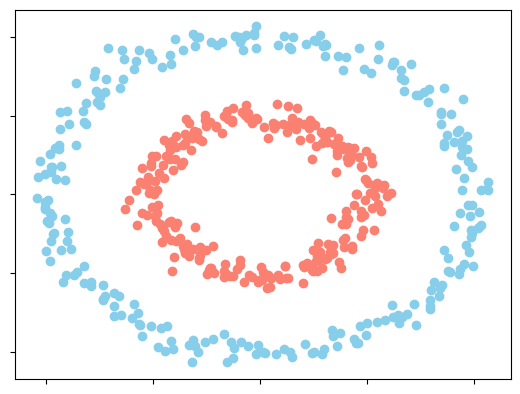

In [7]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar dos anillos concéntricos de datos.
X, Y = make_circles(n_samples=500, noise=0.05, factor=0.5)

# Resolución del mapa de predicción
res = 100

# Coordenadas del mapa de predicción
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

# Tensorflow

Step 0 / 1000 - Loss =  0.4668468 - Acc = 0.5
Step 25 / 1000 - Loss =  0.44852254 - Acc = 0.5
Step 50 / 1000 - Loss =  0.43900105 - Acc = 0.5
Step 75 / 1000 - Loss =  0.43261975 - Acc = 0.5
Step 100 / 1000 - Loss =  0.42773905 - Acc = 0.5
Step 125 / 1000 - Loss =  0.42212015 - Acc = 0.5
Step 150 / 1000 - Loss =  0.4167363 - Acc = 0.5
Step 175 / 1000 - Loss =  0.4118483 - Acc = 0.5
Step 200 / 1000 - Loss =  0.4069503 - Acc = 0.5
Step 225 / 1000 - Loss =  0.40186432 - Acc = 0.5
Step 250 / 1000 - Loss =  0.39703453 - Acc = 0.5
Step 275 / 1000 - Loss =  0.3912212 - Acc = 0.5
Step 300 / 1000 - Loss =  0.38528186 - Acc = 0.5
Step 325 / 1000 - Loss =  0.37948233 - Acc = 0.5
Step 350 / 1000 - Loss =  0.37167817 - Acc = 0.5
Step 375 / 1000 - Loss =  0.35844147 - Acc = 0.5
Step 400 / 1000 - Loss =  0.33429912 - Acc = 0.5
Step 425 / 1000 - Loss =  0.30272934 - Acc = 0.5
Step 450 / 1000 - Loss =  0.27980047 - Acc = 0.5
Step 475 / 1000 - Loss =  0.2649976 - Acc = 0.5
Step 500 / 1000 - Loss =  0.251

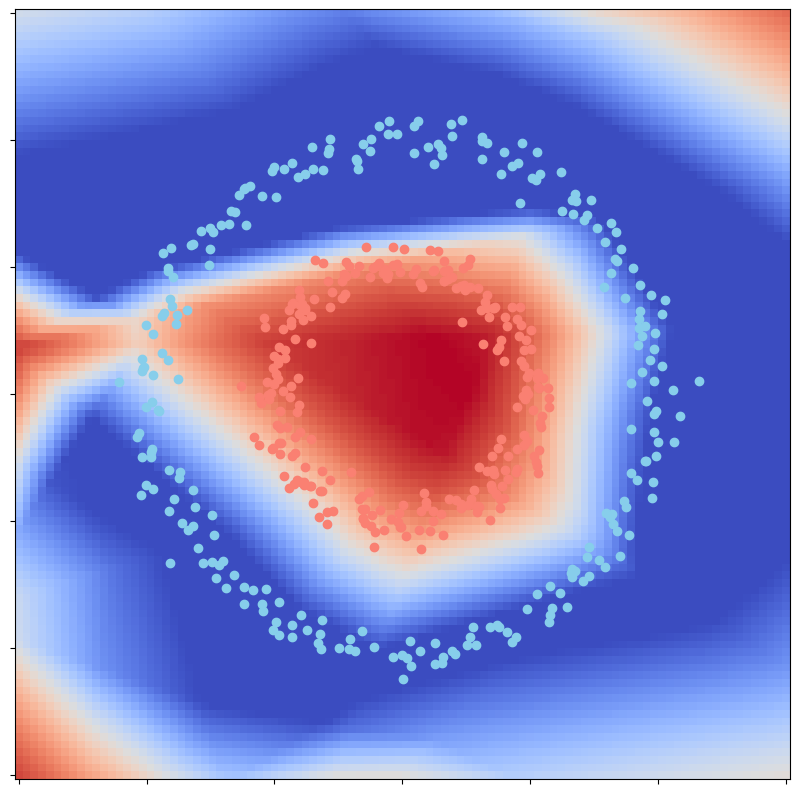

In [ ]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_circles
# import numpy as np

# Creamos nuestros datos artificiales, donde buscaremos clasificar dos anillos concéntricos de datos.
X, Y = make_circles(n_samples=500, noise=0.05, factor=0.5)


# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=(None, X.shape[1]))
iY = tf.placeholder('float', shape=(None))

lr = 0.01 # learning rate
nn = [2, 16, 8, 1] # número de neuronas por carga

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.matmul(iX, W1) + b1)

# Capa 2
W2= tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.matmul(l1, W2) + b2)

# Capa 3
W3= tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3= tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

#Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.matmul(l2, W3) + b3)[:, 0]

#Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
n_steps = 1000 # Número de ciclos de entrenamiento.
iPY = [] # Aqui guardaremos la evolución de la predicción, para la animación.

# Resolución del mapa de predicción
res = 100

# Coordenadas del mapa de predicción
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción
_pY = np.zeros((res, res)) + 0.5


with tf.Session() as sess:
  # Inicializamos todos los parámetros de la red, las matrices Wy
  sess.run(tf.global_variables_initializer())
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
    #Evaluamos al optimizador, a la función de coste y al tensor de salida pY.
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY_train = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY: Y })
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0:
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY_train) == Y)
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción px.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))
      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)

# ----- CÓDIGO ANIMACIÓN -----#
ims = []
fig = plt.figure(figsize=(10, 10))
print("--- Generando animación --")

for fr in range(len(iPY)):
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)
  # Visualización de la nube de datos.
  plt.scatter (X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter (X[Y == 1,0], X[Y == 1,1], c="salmon")
  # plt.title("Resultado Clasificación")
  plt.tick_params (labelbottom=False, labelleft=False)
  ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_html5_video())

# Keras

In [9]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML

lr = 0.01 # learning rate
nn = [2, 16, 8, 1] # número de neuronas por capa.

# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la caра 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

#Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la caра 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['aсс'])

# Y entrenamos al modelo. Los callbacks
model.fit(x=X, y=Y, epochs=100)

Epoch 1/100


RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.

# sklearn

In [ ]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML

lr = 0.01 # learning rate
nn = [2, 16, 8, 1] # número de neuronas por cара.

# Creamos el objeto del modelo de red neuronal multicapa.
clf = sk.neural_network.MLPRegressor(solver='sgd',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 6)

# Y lo entrenamos con nuestro datos.
clf.fit(X, Y)

Iteration 1, loss = 0.18452420
Iteration 2, loss = 0.12613455
Iteration 3, loss = 0.12600251
Iteration 4, loss = 0.12509027
Iteration 5, loss = 0.12665935
Iteration 6, loss = 0.12614622
Iteration 7, loss = 0.12613524
Iteration 8, loss = 0.12649496
Iteration 9, loss = 0.12561713
Iteration 10, loss = 0.12628064
Iteration 11, loss = 0.12650041
Iteration 12, loss = 0.12713821
Iteration 13, loss = 0.12613884
Iteration 14, loss = 0.12618502
Iteration 15, loss = 0.12648179
Iteration 16, loss = 0.12622698
Iteration 17, loss = 0.12599860
Iteration 18, loss = 0.12661207
Iteration 19, loss = 0.12644082
Iteration 20, loss = 0.12627925
Iteration 21, loss = 0.12660053
Iteration 22, loss = 0.12629506
Iteration 23, loss = 0.12659256
Iteration 24, loss = 0.12614053
Iteration 25, loss = 0.12551757
Iteration 26, loss = 0.12718740
Iteration 27, loss = 0.12657969
Iteration 28, loss = 0.12623467
Iteration 29, loss = 0.12669849
Iteration 30, loss = 0.12649350
Iteration 31, loss = 0.12669712
Iteration 32, los

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=6, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)